## 決定木デフォルト

In [27]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split

import graphviz

In [2]:
# pickle ファイルから読み込み
train_pkl = pd.read_pickle('./train.pk1')

In [3]:
train_pkl.shape

(55175, 12)

In [4]:
train_pkl.describe()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,y
count,55175.000000,55175.000000,55175.000000,55175.000000,55175.000000,55175.000000,55175.000000,55175.000000
mean,27792.028944,3.158496,1.237191,1.266298,1.713983,20.933158,94.520616,160.366706
std,16044.979801,2.155461,0.584007,0.850715,1.259778,37.964139,6.906614,168.356651
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000
25%,13902.500000,2.000000,1.000000,1.000000,1.000000,1.000000,93.000000,75.000000
50%,27784.000000,2.000000,1.000000,1.000000,1.000000,6.000000,96.000000,112.000000
75%,41687.500000,4.000000,1.000000,1.000000,2.000000,23.000000,99.000000,185.000000
max,55582.000000,16.000000,8.000000,10.000000,18.000000,605.000000,100.000000,1999.000000


In [5]:
train_pkl.head()

,id,accommodates,bathrooms,bedrooms,beds,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,y
0,0,6,2.0,1.0,4.0,0,0,1,1,1,60.0,138.0
1,1,2,1.0,1.0,1.0,0,0,0,1,9,100.0,42.0
2,2,2,2.0,1.0,1.0,0,0,1,0,27,83.0,65.0
3,3,2,1.0,1.0,1.0,0,0,0,0,38,95.0,166.0
4,4,2,1.0,1.0,1.0,0,0,0,1,5,100.0,165.0


## 訓練データとテストデータに分割

In [6]:
# 訓練とテストデータに分割
train, test = train_test_split(train_pkl, test_size=0.2, random_state=42)

In [7]:
# ターゲットと特徴量の分割
train_X = train.iloc[:, 1:-1].values
train_y = train.y.values

In [8]:
train_X.shape, train_y.shape

((44140, 10), (44140,))

## 訓練データで訓練

In [45]:
DT = tree.DecisionTreeRegressor(max_depth=5, random_state=42)

In [46]:
DT = DT.fit(train_X, train_y)

In [47]:
train.y.name

'y'

In [48]:
DT.feature_importances_

array([0.07039547, 0.33479911, 0.50520048, 0.00390614, 0.01366831,
       0.00157589, 0.        , 0.        , 0.06861182, 0.00184277])

In [49]:
# train_X.columns

In [50]:
# 特徴量の重要度が高い順に表示
print("特徴量の重要度が高い順：")
# sorted：reverse=True 降順
print(sorted(
    zip(map(lambda x: round(x, 3), DT.feature_importances_), train.iloc[:, 1:].columns),
    reverse=True))

特徴量の重要度が高い順：
[(0.505, 'bedrooms'), (0.335, 'bathrooms'), (0.07, 'accommodates'), (0.069, 'number_of_reviews'), (0.014, 'cleaning_fee'), (0.004, 'beds'), (0.002, 'review_scores_rating'), (0.002, 'host_has_profile_pic'), (0.0, 'instant_bookable'), (0.0, 'host_identity_verified')]


In [51]:
# len(train.iloc[:, 1:].columns), train.iloc[:, 1:].columns

In [52]:
# 訓練済みの決定木を視覚化
dot_data = tree.export_graphviz(DT, out_file=None,
                               feature_names=train.iloc[:, 1:-1].columns,
                               class_names=train.y.name,
                               rounded=True,
                               filled=True,
                               special_characters=True)

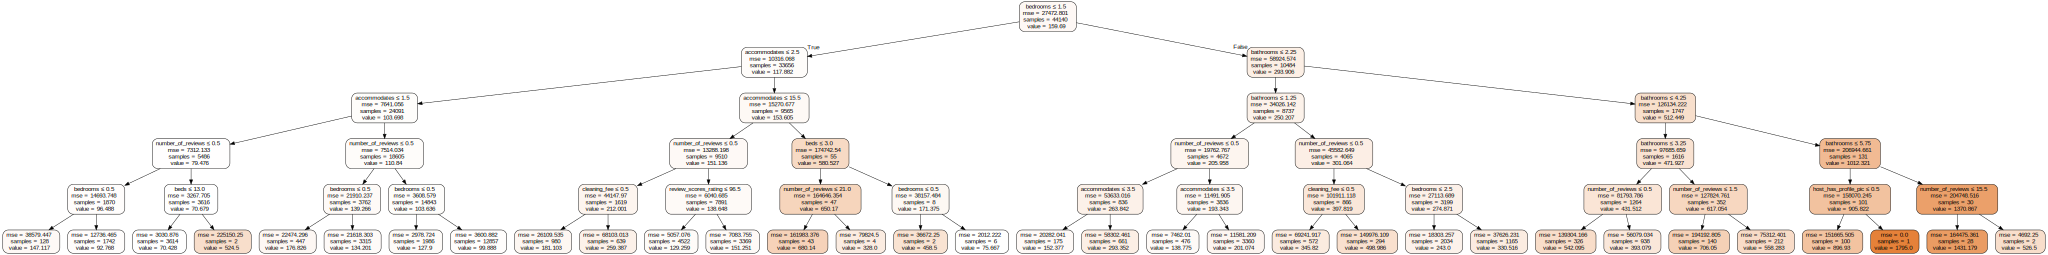

In [74]:
graph = graphviz.Source(dot_data)
graph

In [76]:
# graph.write('.\DT.png')

In [55]:
type(train_X)

numpy.ndarray

In [56]:
sorted(
    zip(map(lambda x: round(x, 3), DT.feature_importances_), train.iloc[:, 1:].columns),
    reverse=True)

[(0.505, 'bedrooms'),
 (0.335, 'bathrooms'),
 (0.07, 'accommodates'),
 (0.069, 'number_of_reviews'),
 (0.014, 'cleaning_fee'),
 (0.004, 'beds'),
 (0.002, 'review_scores_rating'),
 (0.002, 'host_has_profile_pic'),
 (0.0, 'instant_bookable'),
 (0.0, 'host_identity_verified')]

## テストデータで実行

In [57]:
# ターゲットと特徴量の分割
test_x = test.iloc[:, 1:-1].values
test_y = test.y.values

In [58]:
test_x.shape, test_y.shape

((11035, 10), (11035,))

In [59]:
pred_y = DT.predict(test_x)

In [60]:
pred_y.shape

(11035,)

In [61]:
np.sqrt(mean_squared_error(test_y, pred_y))

133.85362203080982

## 検証データで実行

In [62]:
# 検証データ読み込み
valid = pd.read_pickle('./test.pk1')

In [63]:
valid.shape

(18528, 11)

In [64]:
# ID の保存
valid_pass = valid.id.values

In [65]:
valid_X = valid.iloc[:, 1:]

In [66]:
valid_X.describe()

,accommodates,bathrooms,bedrooms,beds,host_has_profile_pic,host_identity_verified,number_of_reviews,review_scores_rating
count,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000
mean,3.161863,1.231110,1.266947,1.706822,0.003022,0.324050,20.790425,94.477386
std,2.155397,0.578248,0.860160,1.242269,0.054895,0.468031,37.457273,7.037526
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,93.000000
50%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.000000,96.000000
75%,4.000000,1.000000,1.000000,2.000000,0.000000,1.000000,23.000000,99.000000
max,16.000000,8.000000,10.000000,16.000000,1.000000,1.000000,451.000000,100.000000


In [67]:
valid_X.shape, train_X.shape

((18528, 10), (44140, 10))

In [68]:
pred_valid_y = DT.predict(valid_X)

In [69]:
pred_valid_y.shape

(18528,)

In [70]:
type(valid_pass), type(pred_valid_y)

(numpy.ndarray, numpy.ndarray)

In [71]:
result_df = pd.DataFrame(pred_valid_y, valid_pass, columns=['y'])

In [72]:
result_df.head()

,y
0,243.000000
1,151.251113
2,176.825503
3,259.386541
4,129.258735


In [73]:
result_df.to_csv("./tree_2.csv", header=False)